<a href="https://colab.research.google.com/github/paulinaslo/Image-Analysis-and-Wholesale-Customer-Classification/blob/main/Image_Analysis_and_Wholesale_Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Wprowadzenie
Cel tego projektu obejmuje prezentację umiejętności analizy danych oraz zastosowania odpowiednich technik i algorytmów w dwóch różnych przypadkach użycia:

Analiza obrazu: W tej części zostanie przeprowadzona analiza obrazu palm_tree.jpg, polegająca na kwantyzacji kolorów przy użyciu algorytmu k-średnich. Celem jest zbadanie, w jaki sposób obraz zmieni się po zastosowaniu tej techniki.

Analiza danych klientów hurtowni: W drugiej części projektu zostanie przeprowadzona analiza zestawu danych "Wholesale customers", zawierającego informacje o zakupach klientów hurtowni. Do identyfikacji wartości odstających oraz grupowania klientów na podstawie ich wzorców zakupowych wykorzystany zostanie algorytm DBSCAN.

### Analiza obrazu

Wczytanie bibliotek

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Wczytanie danych

In [ ]:
 image = mpimg.imread("C:/Users/Admin/Desktop/palm_tree.jpg")

Wyświetlenie kodów RGB dla każdego piksela.

In [ ]:
image

array([[[39, 47, 96],
        [39, 47, 96],
        [38, 46, 95],
        ...,
        [30, 38, 87],
        [32, 38, 88],
        [32, 38, 88]],

       [[39, 47, 96],
        [39, 47, 96],
        [38, 46, 95],
        ...,
        [30, 38, 87],
        [32, 38, 88],
        [32, 38, 88]],

       [[40, 48, 97],
        [39, 47, 96],
        [38, 46, 95],
        ...,
        [29, 37, 86],
        [31, 37, 87],
        [32, 38, 88]],

       ...,

       [[29, 13, 14],
        [33, 17, 18],
        [38, 24, 23],
        ...,
        [ 2,  1,  0],
        [ 2,  1,  0],
        [ 2,  1,  0]],

       [[27, 11, 12],
        [29, 13, 14],
        [32, 18, 17],
        ...,
        [ 2,  1,  0],
        [ 2,  1,  0],
        [ 2,  1,  0]],

       [[25,  9, 10],
        [26, 10, 11],
        [28, 14, 13],
        ...,
        [ 2,  1,  0],
        [ 2,  1,  0],
        [ 2,  1,  0]]], dtype=uint8)

Wyświetlenie zdjęcia

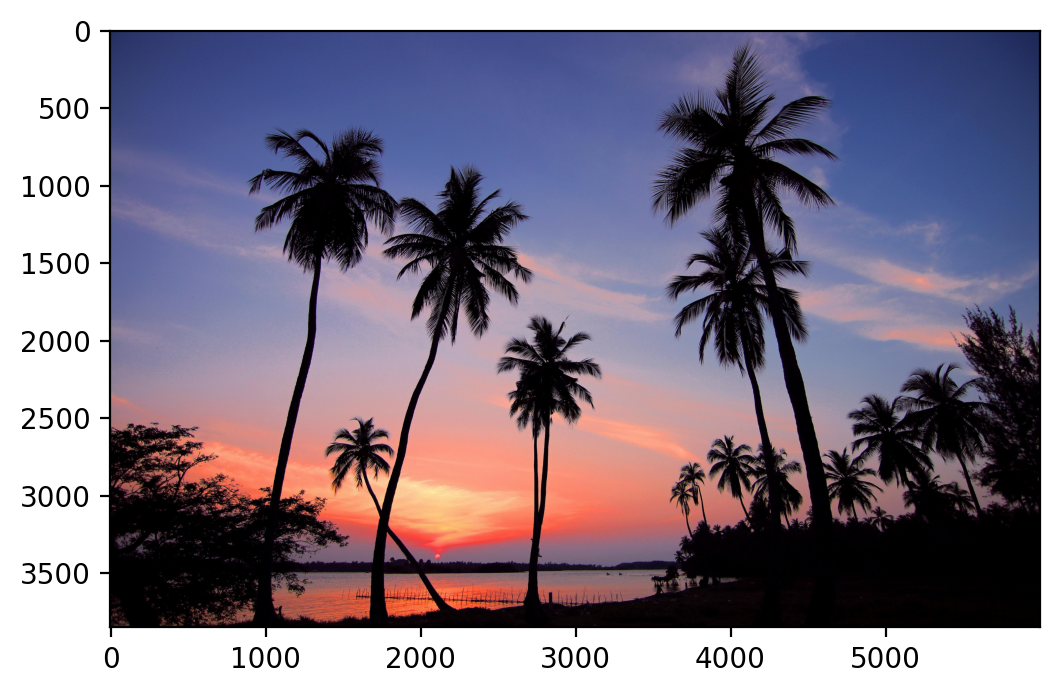

In [ ]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image)

## Kwantyzacja liczby kolorów metodą k-średnich

Wyświetlenie rozmiarów zdjęcia i 3 wymiaru -> inf. nt. kolorów

In [ ]:
image.shape

(3845, 6000, 3)

In [ ]:
(w,h,c) = image.shape

Konwersja danych z 3D do 2D

In [ ]:
image2d = image.reshape(w*h,c)

In [ ]:
image2d.shape

(23070000, 3)

## Zastosowanie metody k-średnich dla liczby skupień równej 6.

In [ ]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=6)
model_kmeans

KMeans(n_clusters=6)

In [ ]:
labels_kmeans = model_kmeans.fit_predict(image2d)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Wyświetlenie etykiet

In [ ]:
labels_kmeans

array([3, 3, 3, ..., 1, 1, 1])

Wyświetlenie informacji nt. centroidów

In [ ]:
model_kmeans.cluster_centers_

array([[236.46285626, 154.48985896, 133.04508639],
       [  8.48318982,   3.7347494 ,   7.97872048],
       [107.17306318, 111.95493739, 156.93016012],
       [ 64.47034696,  75.11710191, 127.27728758],
       [190.13824135, 100.64890329,  92.15476625],
       [170.73017251, 153.2328235 , 172.45381758]])

Stworzenie zmiennej, w której współrzędne centroidów będą zaokrąglone do 0 miejsc po przecinku

In [ ]:
rgb_round = model_kmeans.cluster_centers_.round(0).astype(int)

In [ ]:
rgb_round

array([[236, 154, 133],
       [  8,   4,   8],
       [107, 112, 157],
       [ 64,  75, 127],
       [190, 101,  92],
       [171, 153, 172]])

Stworzenie skwantyzowanego obrazu.

In [ ]:
quantized_img = np.reshape(rgb_round[labels_kmeans], (w, h, c))

In [ ]:
quantized_img

array([[[ 64,  75, 127],
        [ 64,  75, 127],
        [ 64,  75, 127],
        ...,
        [ 64,  75, 127],
        [ 64,  75, 127],
        [ 64,  75, 127]],

       [[ 64,  75, 127],
        [ 64,  75, 127],
        [ 64,  75, 127],
        ...,
        [ 64,  75, 127],
        [ 64,  75, 127],
        [ 64,  75, 127]],

       [[ 64,  75, 127],
        [ 64,  75, 127],
        [ 64,  75, 127],
        ...,
        [ 64,  75, 127],
        [ 64,  75, 127],
        [ 64,  75, 127]],

       ...,

       [[  8,   4,   8],
        [  8,   4,   8],
        [  8,   4,   8],
        ...,
        [  8,   4,   8],
        [  8,   4,   8],
        [  8,   4,   8]],

       [[  8,   4,   8],
        [  8,   4,   8],
        [  8,   4,   8],
        ...,
        [  8,   4,   8],
        [  8,   4,   8],
        [  8,   4,   8]],

       [[  8,   4,   8],
        [  8,   4,   8],
        [  8,   4,   8],
        ...,
        [  8,   4,   8],
        [  8,   4,   8],
        [  8,   4,   8]]

Wyświetlenie obrazu po kwantyzacji.

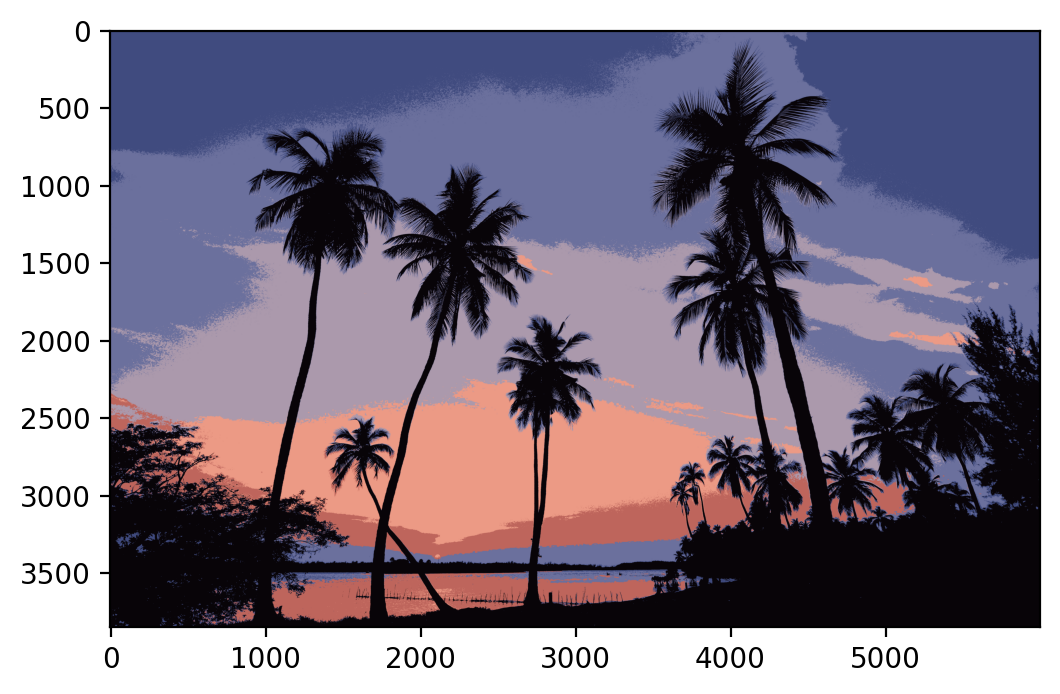

In [ ]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_img)

### Analiza danych klientów hurtowni
Grupowanie wydatków poniesionych na różne kategorie produktów klientów hurtowych w różnych regionach Portugalii.

Pobranie danych ze źródła:
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Wczytanie bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Wczytanie danych

In [ ]:
data = pd.read_csv('C:/Users/Admin/Desktop/Wholesale customers data.csv')

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# EDA (Exploratory Data Analysis)

Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą kolumny 'Channel'.

<Axes: xlabel='Milk', ylabel='Grocery'>

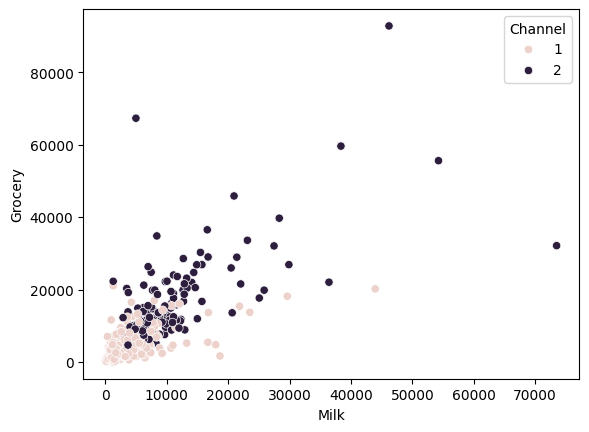

In [ ]:
sns.scatterplot(data=data,x='Milk',y='Grocery',hue='Channel')

Utworzenie histogramu wydatków na mleko na podstawie kolumny 'Channel'.

<Axes: xlabel='Milk', ylabel='Count'>

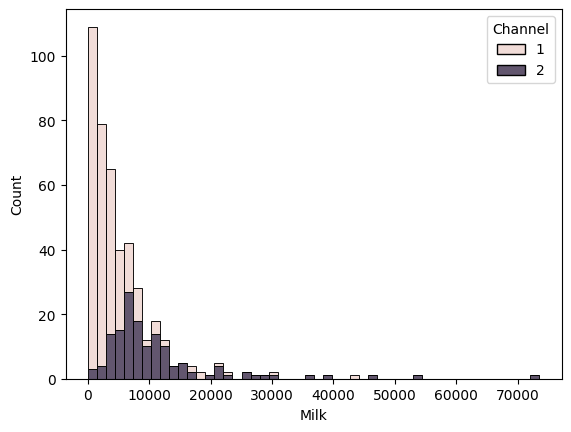

In [ ]:
sns.histplot(data,x='Milk',hue='Channel',multiple="stack")

Utworzenie mapy skupień korelacji między wydatkami na różne kategorie.

Korelacja wydatków na różne kategorie


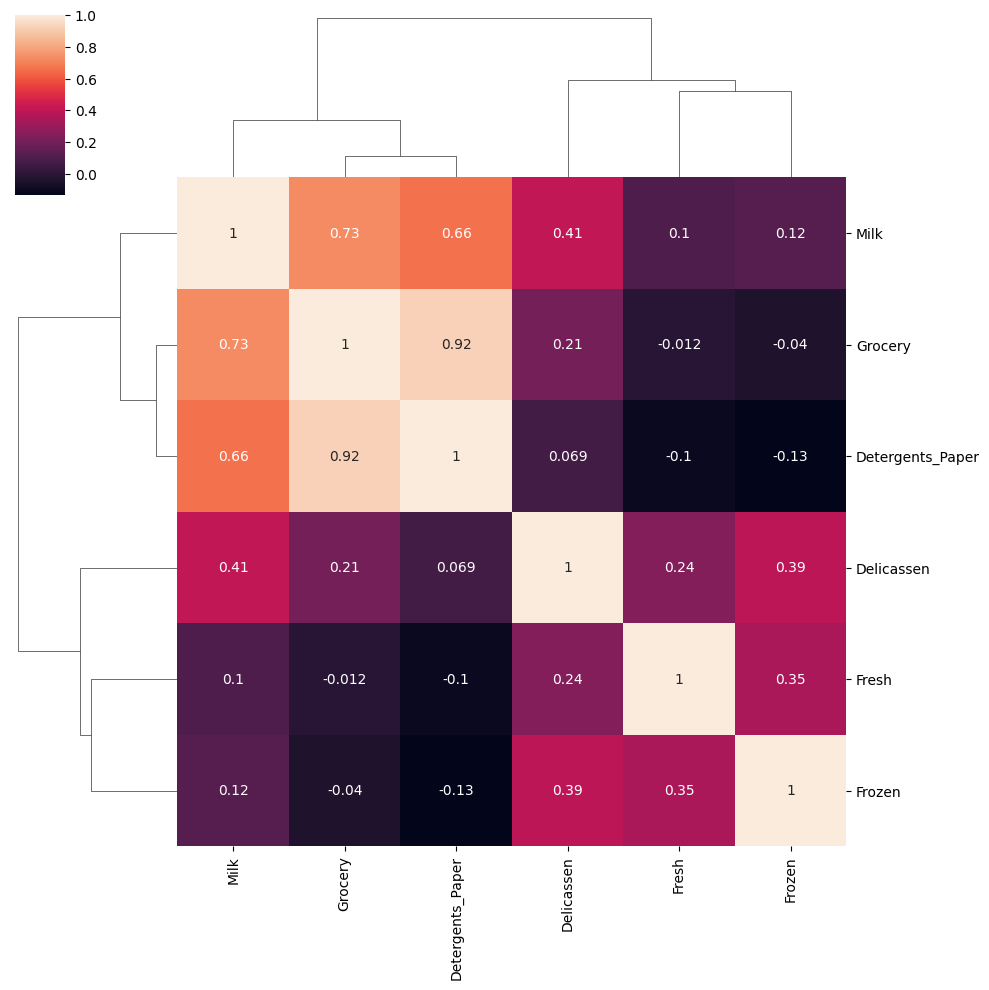

In [ ]:
print('Korelacja wydatków na różne kategorie')
sns.clustermap(data.drop(['Region','Channel'],axis=1).corr(),annot=True);

Utworzenie wykresu porównawczgo składającego się z macierzy par wszystkich zmiennych, różnicowanych na podstawie kolumny

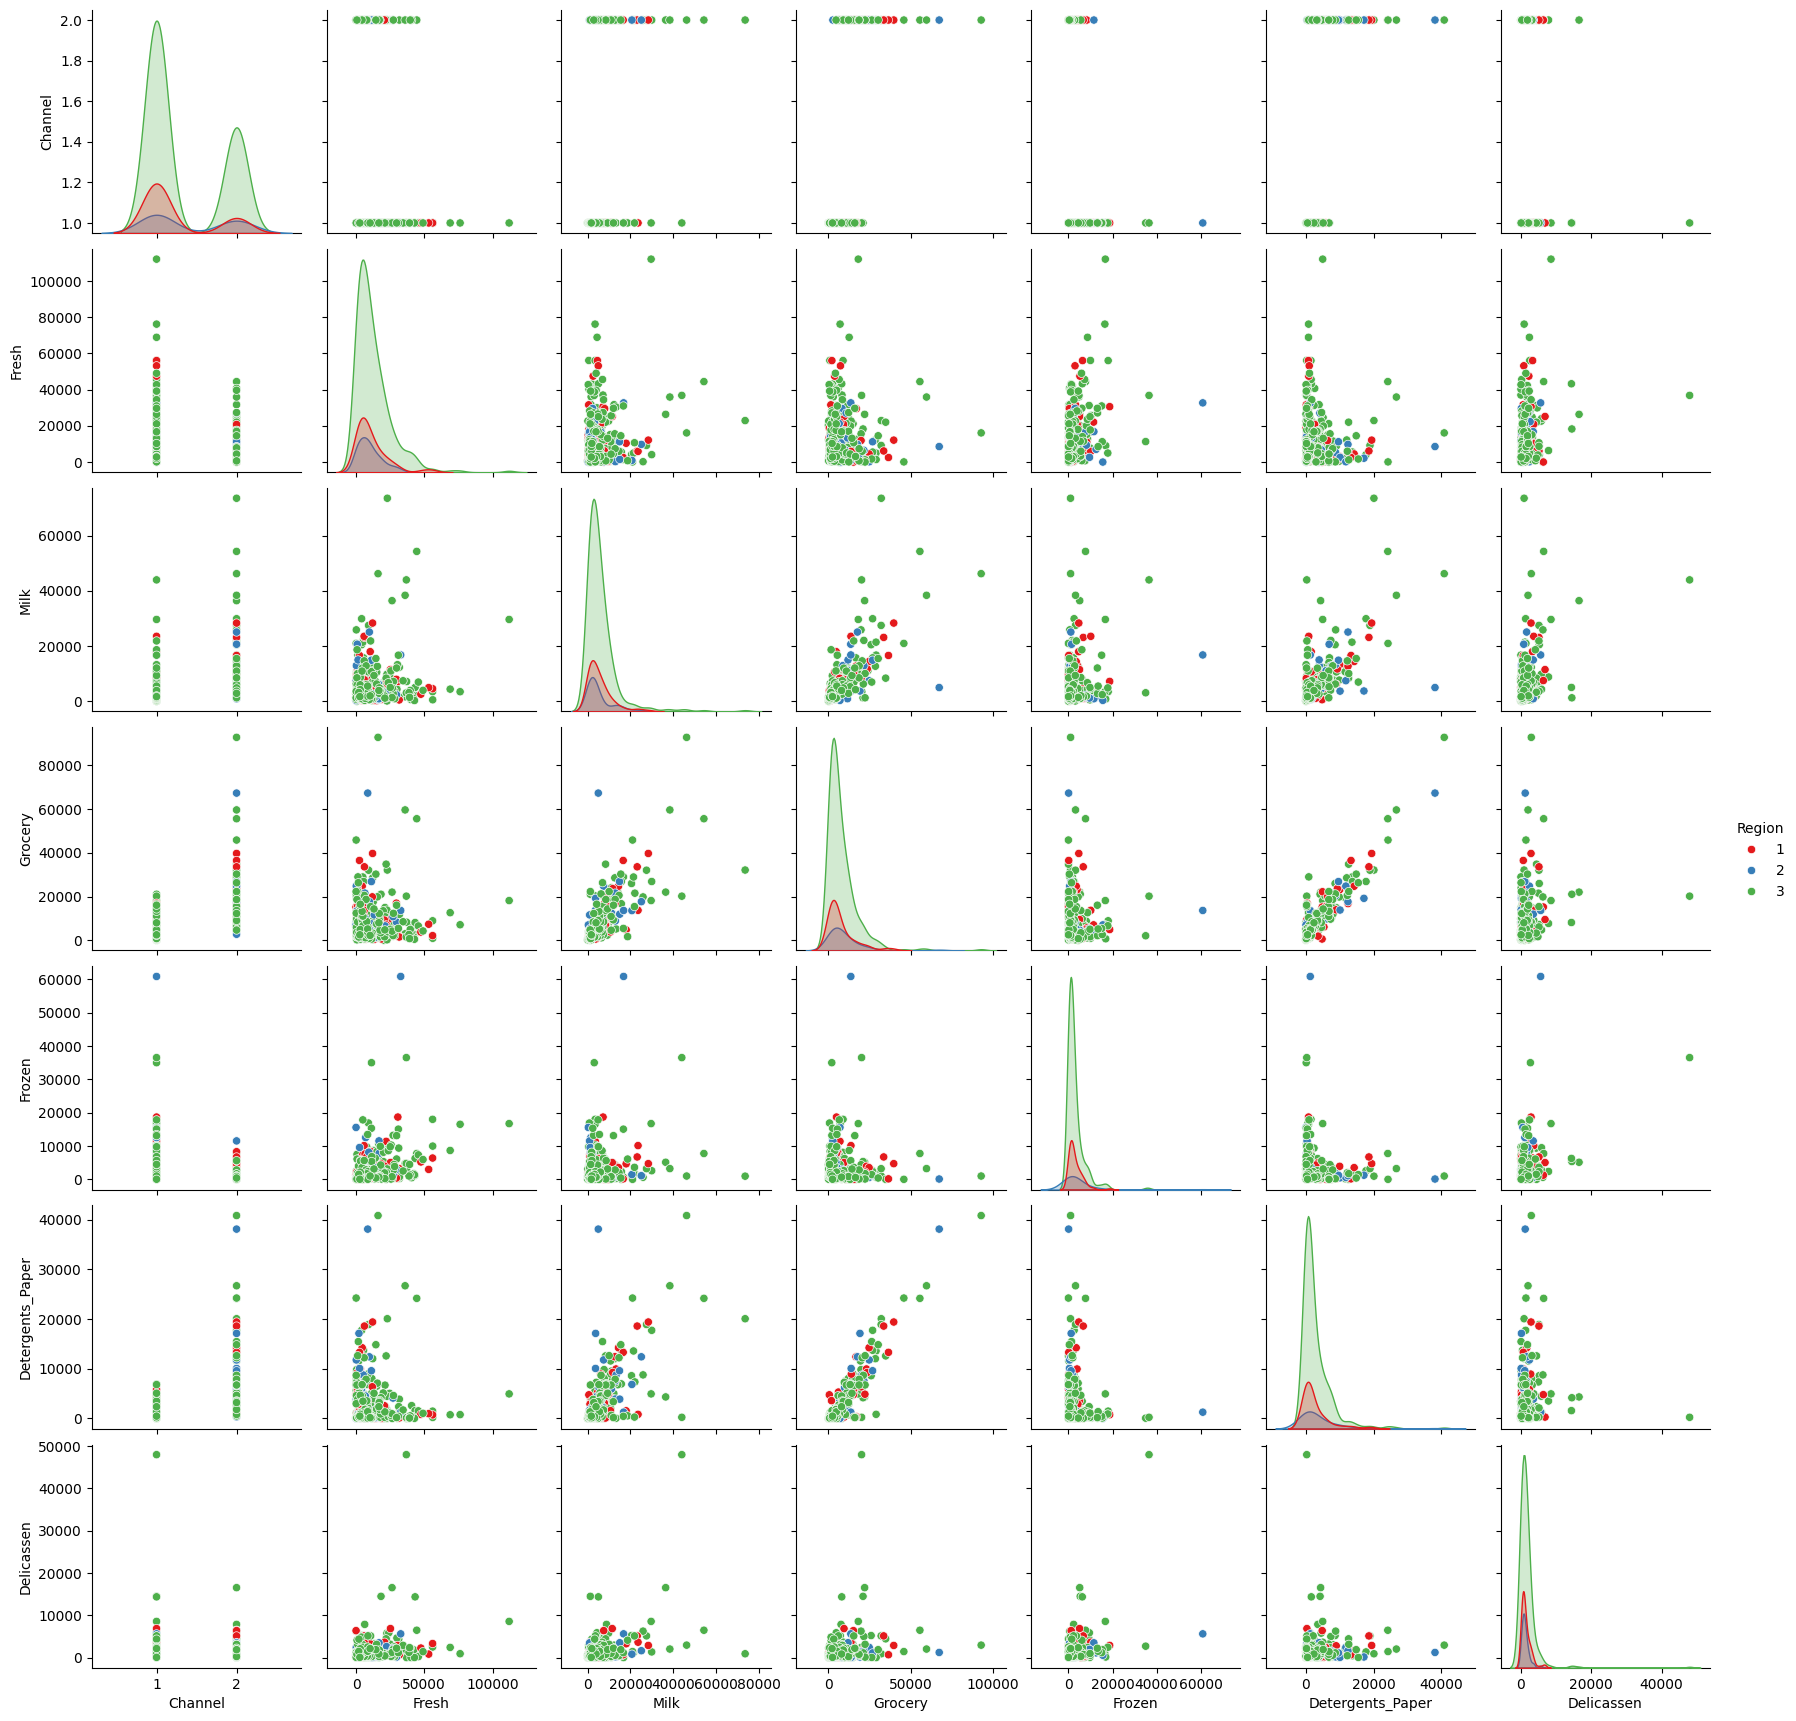

In [ ]:
sns.pairplot(data,hue='Region',palette='Set1')

Przeprowadzenie standaryzacji danych na kolumnach z wyłączeniem kolumny Channel i Region.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(data)

In [ ]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

Użycie DBSCAN i pętli for, aby utworzyć różne modele testujące różne wartości epsilon.

In [ ]:
 from sklearn.cluster import DBSCAN

 outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)

    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Utworzenie wykresu liniowego procentu punktów odstających w funkcji wybranej wartości epsilon.

Text(0.5, 0, 'Wartości epsilon')

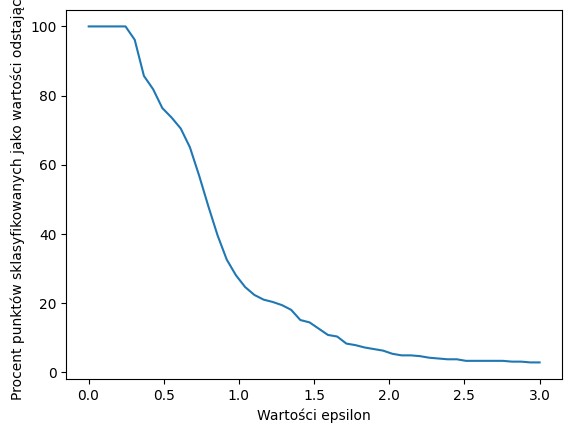

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Procent punktów sklasyfikowanych jako wartości odstające")
plt.xlabel("Wartości epsilon")

Dane dla promienia sąsiedztwa równego 2

In [ ]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

<Axes: xlabel='Grocery', ylabel='Milk'>

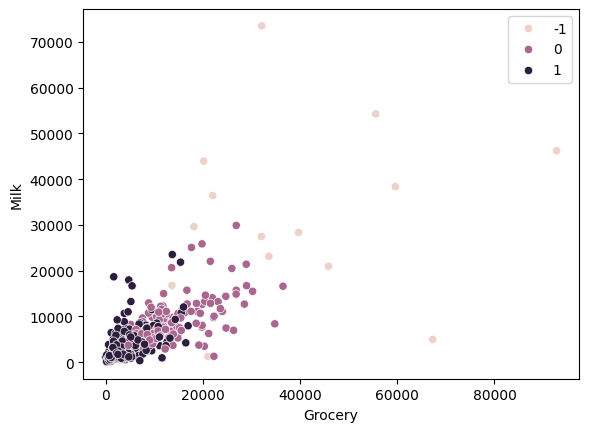

In [ ]:
sns.scatterplot(data=data,x='Grocery',y='Milk',hue=dbscan.labels_)

Utworzenie wykresu punktowego 'Milk' vs 'Detergents Paper', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

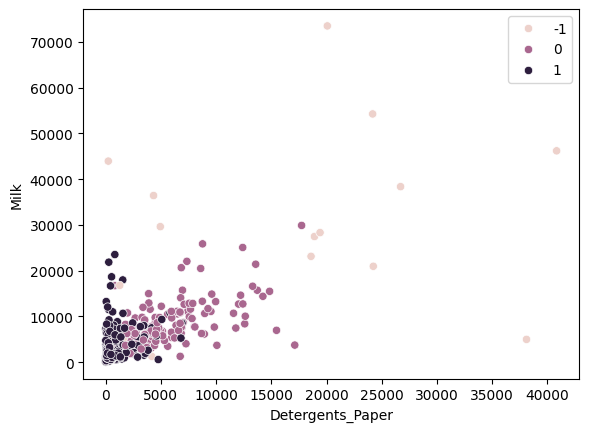

In [ ]:
sns.scatterplot(data=data,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

Utworzenie nowej kolumny "Labels"

In [ ]:
data['Labels'] = dbscan.labels_

In [ ]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


Usunięcie kolumn 'Channel' i 'Region' , a następnie porównanie średnią skupień i wartości odstających dla kwot wydatków w poszczególnych kategoriach.

In [ ]:
data_filtered = data.drop(columns=['Channel', 'Region'])
cluster_means = data_filtered.groupby('Labels').mean()

In [ ]:
cluster_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


<Axes: ylabel='Labels'>

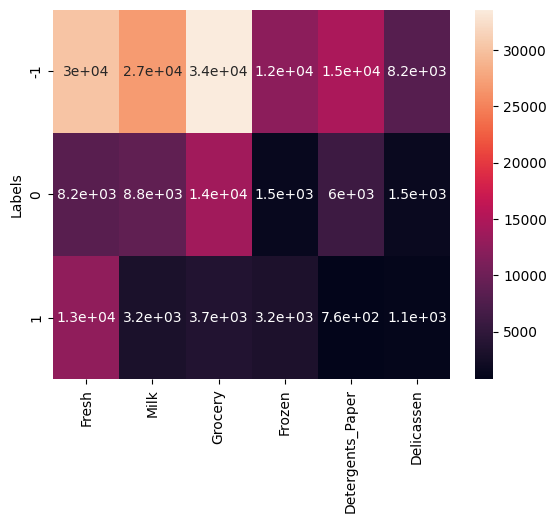

In [ ]:
sns.heatmap(cluster_means, annot=True)

Wartości odstające są definiowane przez bardzo wysokie kwoty wydatków. Są one znacznie wyższe niż te przypisane do etykiet 0 i 1. Analizując heatmapę można zauważyć, że największe kwoty są przeznaczane na arytkuły spożywcze, mleko czy produkty świeże. Dalej plasują się detergenty, mrożonki i artykuły luksusowe/delikatesy. Klaster 0 - większe wydatki dotyczą kategorii produktów świeżych, mlecznych, mniejsze, podobne koszty obejmują artykuły mrożone i detegenty. Klaster 1 - najmniejsze wydatki poniesione na mleko, artykuły mrożone, delikatesy, detergenty.